# 6. Факторный анализ

[Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [1]:
# !pip install statsmodels

import pandas as pd
from statsmodels.multivariate.factor import Factor

df = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [2]:
df.shape

(253680, 22)

In [3]:
df_sample = df.sample(1000)

In [4]:
df_sample = df_sample[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]
# print(df_sample.describe())

In [5]:
# приведение к одной шкале
for col in df.columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    
df_sample = df.sample(1000)
df_sample = df_sample[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]
# print(df_sample.describe())

In [6]:
fa = Factor(df, n_factor = 3, method = 'pa')
res = fa.fit()

In [7]:
# таблица факторных нагрузок
res.get_loadings_frame(threshold = 0.3)

# три фактора: уровень жизни, возрастные изменения и питание
# factor2 выглядит не очень надежно

,factor 0,factor 1,factor 2
GenHlth,-0.737669,0.068634,-0.109523
DiffWalk,-0.619598,0.020068,-0.190070
PhysHlth,-0.617161,0.159663,-0.386552
Income,0.538718,-0.226002,-0.227963
HighBP,-0.447299,-0.363881,0.104761
Education,0.424014,-0.163657,-0.361375
Diabetes_012,-0.400204,-0.189760,0.042026
PhysActivity,0.367441,-0.081766,-0.083452
MentHlth,-0.354017,0.290727,-0.206318
HeartDiseaseorAttack,-0.352930,-0.205995,-0.002117


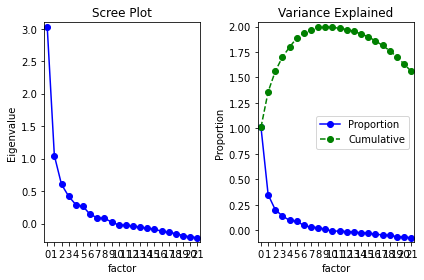

In [8]:
# Выбор числа факторов

import matplotlib.pyplot as plt
res.plot_scree()
plt.show()

In [9]:
# возьмем 2 фактора
fa = Factor(df, n_factor=4, method='pa')
res = fa.fit()
res.get_loadings_frame(threshold=0.5)

,factor 0,factor 1,factor 2,factor 3
GenHlth,-0.735658,0.060090,-0.140921,-0.083876
DiffWalk,-0.615682,0.008891,-0.195822,0.043372
PhysHlth,-0.608425,0.136664,-0.385874,-0.003801
Income,0.578737,-0.272872,-0.292657,-0.337446
HighBP,-0.444002,-0.354978,0.095572,-0.074813
Education,0.427344,-0.170735,-0.348006,-0.128378
Diabetes_012,-0.398598,-0.186070,0.026937,-0.098581
PhysActivity,0.366678,-0.079225,-0.066359,0.094203
MentHlth,-0.351565,0.278035,-0.226389,-0.032720
HeartDiseaseorAttack,-0.350324,-0.205053,-0.003855,-0.011448


Вывод: факторы, **потенциально связанные** с сахарным диабетом могут быть объединены в две группы. Одни касаются уровня жизни, другие возрастных изменений.

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# df = pd.read_csv('data/WVS Wave 6 2010-2014.csv', index_col = 'Unnamed: 0')
df = pd.read_csv('data/WVS Wave 6 2010-2014.csv')
# df = pd.read_csv('WVS Wave 6 2010-2014.csv', index_col = 'Unnamed: 0')
# df = pd.read_csv('WVS Wave 6 2010-2014.csv')

# print(df.describe())

# приведение к одной шкале
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

pca = PCA(n_components = 4)
pca.fit(df)
df = pca.fit_transform(df) 

print(df.shape, '\n\n', pca.components_)

(89565, 4) 

 [[ 0.00315568 -0.17942895 -0.18706643 -0.25571159 -0.25111929 -0.24006079
  -0.25939473 -0.27499531 -0.27742604 -0.2547778  -0.28533162 -0.27381059
  -0.24854548 -0.25723262 -0.2544708  -0.24562797 -0.22917162]
 [ 0.03820378  0.02820961  0.1808657   0.09620891  0.13195219  0.11773282
   0.2291871   0.17660778  0.21937475  0.28518185  0.14081717  0.12480797
  -0.29325069 -0.33884743 -0.26133707 -0.4494821  -0.45252785]
 [-0.40467773 -0.29354675 -0.4460517  -0.29833301 -0.31056459  0.30107403
  -0.07271611 -0.00778722  0.06997194  0.39005682  0.16097534  0.26519338
  -0.02839787 -0.00596849 -0.08480761  0.06769111  0.06131778]
 [ 0.86260465 -0.18727427  0.05995982 -0.21620476 -0.22589696  0.20559355
  -0.05002789 -0.0444093   0.03366592  0.17904407  0.05263712  0.07108158
  -0.0050942  -0.03853443 -0.07149522  0.10318321  0.12019207]]


In [11]:
# from statsmodels.multivariate.factor import Factor
# fa = Factor(df, n_factor=4, method='pa')
# res = fa.fit()
# res.get_loadings_frame()